# Hacker News


![](https://s3.amazonaws.com/dq-content/354/hacker_news.jpg)

In this project, we'll work with a dataset of submissions to popular technology site **Hacker News**.

[Hacker News](https://news.ycombinator.com/) is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result.

### Data dictionary

-`id`: the unique identifier from Hacker News for the post

-`title`: the title of the post

-`url`: the URL that the posts links to, if the post has a URL

-`num_points`: the number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes

-`num_comments`: the number of comments on the post

-`author`: the username of the person who submitted the post

-`created_at`: the date and time of the post's submission

***

We're specifically interested in posts with titles that begin with either `Ask HN` or `Show HN`. 

Users submit `Ask HN` posts to ask the Hacker News community a specific question.

<br>

We'll compare these two types of posts to determine the following:

- Do `Ask HN` or `Show HN` receive more comments on average?
- Do posts created at a certain time receive more comments on average?

### 1. Load `hacker_news.csv` dataset

In [1]:
from csv import reader

In [2]:
!ls -lh dataset

total 23M
-rw-rw-r-- 1 ion ion 3,0M feb  3 08:15 hacker_news.csv
-rw-rw-r-- 1 ion ion  20M ene 31 12:14 HN_posts_year_to_Sep_26_2016.csv.zip
-rw-rw-r-- 1 ion ion   72 feb  3 09:44 Untitled.ipynb


In [3]:
! file -k dataset/hacker_news.csv

dataset/hacker_news.csv: CSV text\012- , Unicode text, UTF-8 text, with very long lines (360), with LF, NEL line terminators


In [4]:
dataset = open('dataset/hacker_news.csv',encoding = 'utf-8')
dataset_read = reader(dataset)
hn = list(dataset_read)

### 2. Remove headers 

In [5]:
header = hn[0] # We copy the first row that corresponds to the columns of the dataset into the Header variable

In [6]:
header

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

In [7]:
del hn[0] # We delete the row that corresponds to the header 

In [8]:
hn[0:5] # and keep all the contents of the dataset

[['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  '52',
  'ne0phyte',
  '8/4/2016 11:52'],
 ['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  '10',
  'josep2',
  '1/26/2016 19:30'],
 ['11964716',
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  '2',
  '1',
  'vezycash',
  '6/23/2016 22:20'],
 ['11919867',
  'Technology ventures: From Idea to Enterprise',
  'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
  '3',
  '1',
  'hswarna',
  '6/17/2016 0:01'],
 ['10301696',
  'Note by Note: The Making of Steinway L1037 (2007)',
  'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
  '8',
  '2',
  'walterbell',
  '9/30/2015 4:12']]

### 3. Extracting Ask HN and Show HN Posts
 
Since we're only concerned with post titles beginning with `Ask HN` or `Show HN`, we'll create new lists of lists containing just the data for those titles.

In [9]:
ask_posts = []
show_posts = []
other_posts = []

for fila in hn:
    title = fila[1] #title
    title = title.lower()   # all in lower_case
    
    if title.startswith('ask hn'):
        ask_posts.append(fila)
        
    elif title.startswith('show hn'):
        show_posts.append(fila)
        
    else:
        other_posts.append(fila)

print(f" ask posts number {len(ask_posts)} \n show post number {len(show_posts)} \n other number     {len(other_posts)} ")

 ask posts number 1744 
 show post number 1162 
 other number     17194 


### 4. Calculating the average number of comments for `Ask HN` and `Show HN` Posts

Let's determine if ask posts or show posts receive more comments on average.

In [11]:
header

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

In [12]:
total_ask_comments = 0
total_ask_length = len(hn)

for row in hn:
    total_ask_comments += int(row[4]) # num_comments column

avg_ask_comments = (total_ask_length / total_ask_comments) * 100
print(f"Average ask comments: {avg_ask_comments}%")

Average ask comments: 4.031885999927788%


In [13]:
total_show_comments = 0
total_show_length = len(hn)

for row in hn:
    total_ask_comments += int(row[4]) # num_comments column

avg_show_comments = (total_show_length / total_ask_comments) * 100
print(f"Average show comments: {avg_show_comments}%")

Average show comments: 2.015942999963894%


### Summary:

We can see that the number of comments received by the posts where the questions are asked is practically double that in the posts where the comments are shown.

### 5. Finding the number of `Ask Posts` and comments by hour created.

In [14]:
import datetime as dt

In [15]:
stamp = []
result_list = []

for row in ask_posts:
    time_stamp = row[6]  #created_at
    time_obj = dt.datetime.strptime(time_stamp, "%m/%d/%Y %H:%M")
    stamp.append(time_obj)
    
    num_comment = row[4] #num_comments

    tupla = (time_stamp, num_comment)
    result_list.append(tupla)

result_list[0:5]

[('8/16/2016 9:55', '6'),
 ('11/22/2015 13:43', '29'),
 ('5/2/2016 10:14', '1'),
 ('8/2/2016 14:20', '3'),
 ('10/15/2015 16:38', '17')]

In [16]:
# ('8/28/2016 18:06', '2') <- date and number of comments (tuple)

counts_by_hour   = {} # Contains the number of ask posts created during each hour of the day.
comments_by_hour = {} # Contains the corresponding number of comments ask posts created at each hour received.
tittle_by_hour = {}

num_points = 0

for row in result_list: # result_list content (-->'8/28/2016 18:06'<--, '2')
    time_stamp = row[0]
    time_obj = dt.datetime.strptime(time_stamp, "%m/%d/%Y %H:%M")
    
    hour = time_obj.hour #Extracting the hour from the `time_stamp`.
    num_comments = int(row[1])# ('8/28/2016 18:06',-->'2'<--) num coments
    
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1              # times per hour
        comments_by_hour[hour] = num_comments # coments por hour
        
    elif hour in counts_by_hour:
        counts_by_hour[hour] += 1             # times per hour
        comments_by_hour[hour] += num_comments # coments por hour
        

print(f"Counts by hour: {counts_by_hour}")
print("---")
print(f"Comments by hour: {comments_by_hour}")

Counts by hour: {9: 45, 13: 85, 10: 59, 14: 107, 16: 108, 23: 68, 12: 73, 17: 100, 15: 116, 21: 109, 20: 80, 2: 58, 18: 109, 3: 54, 5: 46, 19: 110, 1: 60, 22: 71, 8: 48, 4: 47, 0: 55, 6: 44, 7: 34, 11: 58}
---
Comments by hour: {9: 251, 13: 1253, 10: 793, 14: 1416, 16: 1814, 23: 543, 12: 687, 17: 1146, 15: 4477, 21: 1745, 20: 1722, 2: 1381, 18: 1439, 3: 421, 5: 464, 19: 1188, 1: 683, 22: 479, 8: 492, 4: 337, 0: 447, 6: 397, 7: 267, 11: 641}


### 6. Calculating the Average Number of Comments for `Ask HN` Posts by Hour



In [17]:
avg_by_hour = []

for horas in counts_by_hour: # {9: 45, 13: 85,...}
    avg = comments_by_hour[horas] / counts_by_hour[horas]
    avg_by_hour.append([horas, avg]) #list, and the tuple.
    
avg_by_hour # result in another tupla

[[9, 5.5777777777777775],
 [13, 14.741176470588234],
 [10, 13.440677966101696],
 [14, 13.233644859813085],
 [16, 16.796296296296298],
 [23, 7.985294117647059],
 [12, 9.41095890410959],
 [17, 11.46],
 [15, 38.5948275862069],
 [21, 16.009174311926607],
 [20, 21.525],
 [2, 23.810344827586206],
 [18, 13.20183486238532],
 [3, 7.796296296296297],
 [5, 10.08695652173913],
 [19, 10.8],
 [1, 11.383333333333333],
 [22, 6.746478873239437],
 [8, 10.25],
 [4, 7.170212765957447],
 [0, 8.127272727272727],
 [6, 9.022727272727273],
 [7, 7.852941176470588],
 [11, 11.051724137931034]]

With this format its difficult to identify the hours with the highest values:

        [[9, 5.5777777777777775],
         [13, 14.741176470588234],
         [10, 13.440677966101696],
         [14, 13.233644859813085],
         ...
         ]

Let's sorting the list of lists `avg_by_hour` 

### 7. Sorting and Printing Values from a List of Lists `avg_by_hour`.

In [18]:
sorted_avg_by_hour = sorted(avg_by_hour, reverse=True)
sorted_avg_by_hour

[[23, 7.985294117647059],
 [22, 6.746478873239437],
 [21, 16.009174311926607],
 [20, 21.525],
 [19, 10.8],
 [18, 13.20183486238532],
 [17, 11.46],
 [16, 16.796296296296298],
 [15, 38.5948275862069],
 [14, 13.233644859813085],
 [13, 14.741176470588234],
 [12, 9.41095890410959],
 [11, 11.051724137931034],
 [10, 13.440677966101696],
 [9, 5.5777777777777775],
 [8, 10.25],
 [7, 7.852941176470588],
 [6, 9.022727272727273],
 [5, 10.08695652173913],
 [4, 7.170212765957447],
 [3, 7.796296296296297],
 [2, 23.810344827586206],
 [1, 11.383333333333333],
 [0, 8.127272727272727]]

In [19]:
import matplotlib.pyplot as plt

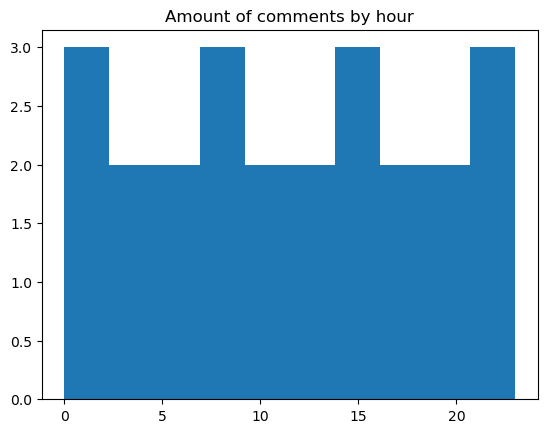

In [20]:
plt.title("Amount of comments by hour")
plt.hist(counts_by_hour)
plt.ticklabel_format(axis='y', style='plain')
plt.show()